## 🧪 Introduction & Context

The main goal of this project is to **freely explore an electric vehicle dataset**, applying filters and visualizations to uncover insights and interesting patterns.

- The focus is on **exploratory data analysis (EDA)** only — no statistical tests or predictive modeling were applied.
- Most features in the dataset are **categorical or text-based**, which would require more advanced preprocessing steps if we were to model them. Since the purpose here is exploration, we’re keeping it simple.
- As for the numerical features, I chose not to calculate correlations between them, since they represent **very different concepts** and wouldn’t offer much value when compared directly.

In this notebook, we’ll start by loading the necessary packages and importing the dataset into our kernel.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [3]:
main_df = pd.read_csv('data/Electric Vehicle Population Data.csv')

##  First Look at the Dataset

Let’s use a quick `.head()` to preview the first few rows of the dataset. This helps us:

- Get an overview of the **available columns**
- Understand the **types of values** we’re working with
- Start thinking about **potential areas to explore**

This initial step gives us a general sense of the dataset structure and helps guide the next steps in our EDA.


In [4]:
main_df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,2T3YL4DV0E,King,Bellevue,WA,98005.0,2014,TOYOTA,RAV4,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,103.0,0.0,41.0,186450183,POINT (-122.1621 47.64441),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
1,5YJ3E1EB6K,King,Bothell,WA,98011.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,1.0,478093654,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,5UX43EU02S,Thurston,Olympia,WA,98502.0,2025,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,40.0,0.0,35.0,274800718,POINT (-122.92333 47.03779),PUGET SOUND ENERGY INC,5.306701e+10
3,JTMAB3FV5R,Thurston,Olympia,WA,98513.0,2024,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,2.0,260758165,POINT (-122.81754 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJYGDEE8M,Yakima,Selah,WA,98942.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,236581355,POINT (-120.53145 46.65405),PACIFICORP,5.307700e+10


## Data Cleaning: Duplicates and Null Values

Before diving into the analysis, we'll start with some basic data cleaning steps:

- Identify and remove duplicate rows to ensure the dataset is accurate.
- Check for missing values that could affect visualizations or lead to misleading insights.

Once the dataset is cleaned, we'll proceed with some basic exploratory data analysis to understand the distribution of the data and look for potential patterns.


In [5]:
#Check duplicates

main_df.duplicated().sum()

0

In [6]:
#Check Nulls

main_df.isnull().sum()

VIN (1-10)                                             0
County                                                 4
City                                                   4
State                                                  0
Postal Code                                            4
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        27
Base MSRP                                             27
Legislative District                                 481
DOL Vehicle ID                                         0
Vehicle Location                                      11
Electric Utility                                       4
2020 Census Tract                                      4
dtype: int64

### Handling Missing Values

After checking for null values, we can see that there are some missing entries in the dataset. However, they represent only a small percentage of the total records.

Given their low impact, we can safely proceed by removing these rows to keep the dataset clean and avoid unnecessary complications during analysis.


In [7]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232230 entries, 0 to 232229
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         232230 non-null  object 
 1   County                                             232226 non-null  object 
 2   City                                               232226 non-null  object 
 3   State                                              232230 non-null  object 
 4   Postal Code                                        232226 non-null  float64
 5   Model Year                                         232230 non-null  int64  
 6   Make                                               232230 non-null  object 
 7   Model                                              232230 non-null  object 
 8   Electric Vehicle Type                              232230 non-null  object

### Checking Data Types

We used a quick `.info()` to review the data types of each column and confirm that everything is formatted correctly.

One important observation is that the `'Model Year'` column is currently stored as an integer. To prepare it for time-based analysis, we’ll convert it to a datetime format. This will allow us to work with it more effectively when exploring trends over time.


In [30]:
#Convert Model Year to datetime
main_df['Model Year'] = pd.to_datetime(main_df['Model Year'], format='%Y', errors='coerce')


In [ ]:
#Check the data types to sse if datatime change took place
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 231715 entries, 0 to 232229
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype         
---  ------                                             --------------   -----         
 0   VIN (1-10)                                         231715 non-null  object        
 1   County                                             231715 non-null  object        
 2   City                                               231715 non-null  object        
 3   State                                              231715 non-null  object        
 4   Postal Code                                        231715 non-null  float64       
 5   Model Year                                         231715 non-null  datetime64[ns]
 6   Make                                               231715 non-null  object        
 7   Model                                              231715 non-null  object        
 8   Electric 

### Verifying Dataset Size

Before dropping the null values, we quickly checked the shape of the DataFrame to understand the overall dataset size.

This helps us confirm that removing the rows with missing values won't significantly impact our analysis, since the proportion of missing data is small relative to the total number of records.


In [8]:
main_df.shape

(232230, 17)

### Removing Null Values

Since the number of null values is small compared to the total dataset size, we decided to remove those rows entirely.

This simplifies the analysis and ensures that our visualizations and summaries are based on complete data without significantly affecting the overall results.


In [9]:
#Drop nulls

main_df.dropna(inplace=True)

In [ ]:
#Sanity check to see if nulls were dropped
main_df.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [ ]:
#Shape looks good after dropping nulls
main_df.shape

(231715, 17)

### Exploring Electric Vehicle Types by State

To better understand how electric vehicles are distributed across the country, we created a subset of the data focusing on the `'Electric Vehicle Type'` column and grouped it by state.

This allows us to:
- See the frequency of different electric vehicle types (e.g., BEV, PHEV).
- Identify which states have higher adoption of each type.
- Explore potential regional preferences or trends.

We then visualized this distribution using a plot to make the comparison clearer across states.


In [12]:
main_df['Electric Vehicle Type'].nunique()

2

In [13]:
main_df['City'].nunique()

486

In [14]:
#Create a table with the count of different electric vehicle types for different states

eletric_type = main_df.groupby(['City'])['Electric Vehicle Type'].value_counts()
eletric_type = eletric_type.sort_values(ascending=False)

eletric_type_df = eletric_type.reset_index(name='Count')
eletric_type_df.head(10)


,City,Electric Vehicle Type,Count
0,Seattle,Battery Electric Vehicle (BEV),29536
1,Bellevue,Battery Electric Vehicle (BEV),9824
2,Seattle,Plug-in Hybrid Electric Vehicle (PHEV),7325
3,Redmond,Battery Electric Vehicle (BEV),7030
4,Bothell,Battery Electric Vehicle (BEV),6635
5,Vancouver,Battery Electric Vehicle (BEV),6203
6,Sammamish,Battery Electric Vehicle (BEV),5759
7,Kirkland,Battery Electric Vehicle (BEV),5590
8,Renton,Battery Electric Vehicle (BEV),4916
9,Olympia,Battery Electric Vehicle (BEV),4280


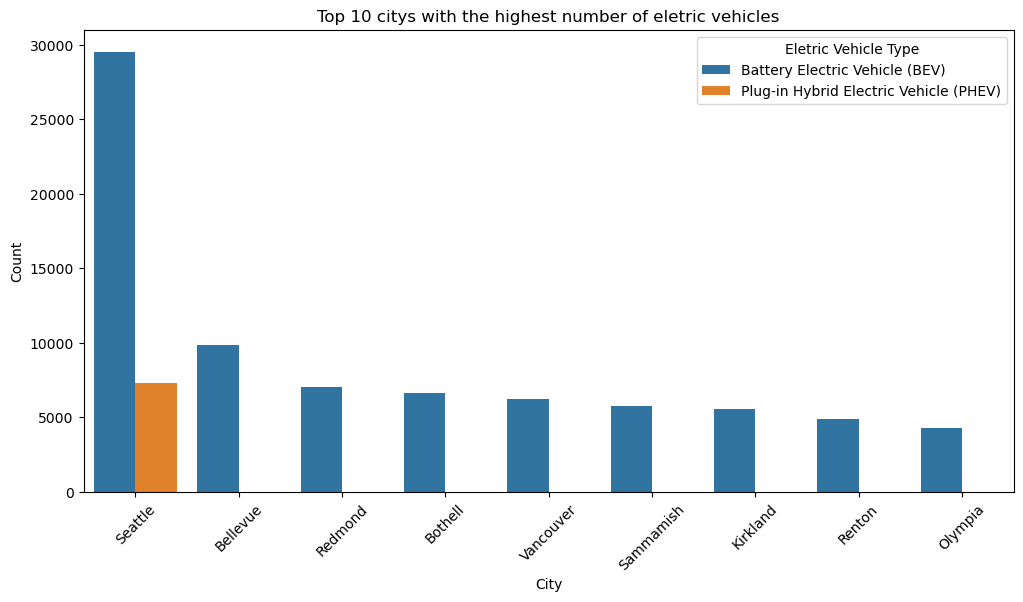

In [15]:
# Create a plot with the top 10 citys with the highest number of counts of vehicles to compare between them

top_10 = eletric_type.head(10)
top_10 = top_10.reset_index()
top_10.columns = ['City', 'Electric Vehicle Type', 'Count']

plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Count', hue='Electric Vehicle Type', data=top_10)
plt.title('Top 10 citys with the highest number of eletric vehicles')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Eletric Vehicle Type')


### Top 10 Cities by Electric Vehicle Count

We created a bar plot showing the top 10 cities with the highest number of electric vehicles, grouped by electric vehicle type (BEV and PHEV).

From the chart, we can observe:

- **Seattle** stands out with the highest number of electric vehicles by far.
- It’s also the **only city among the top 10** that has a visible count of **Plug-in Hybrid Electric Vehicles (PHEV)**.
- All other cities are dominated exclusively by **Battery Electric Vehicles (BEV)**.

This suggests a potential **imbalance in the distribution** of electric vehicle types, with BEVs being far more common. To confirm this assumption, we’ll create a plot to visualize the overall distribution between BEV and PHEV across the entire dataset.


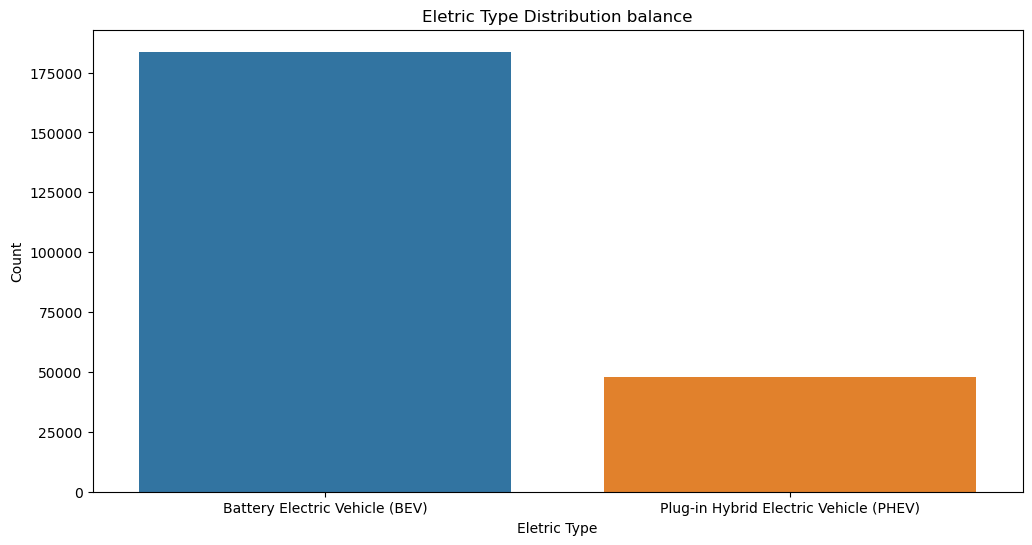

In [16]:
# Lets also check class balance between the different electric vehicle types

plt.figure(figsize=(12, 6))
sns.countplot(x='Electric Vehicle Type', data=main_df)
plt.title('Eletric Type Distribution balance')
plt.xlabel('Eletric Type')
plt.ylabel('Count')
plt.show()


### Electric Vehicle Type Distribution

To confirm our earlier observation, we plotted the overall distribution of electric vehicle types in the dataset. The chart clearly shows a significant imbalance between the two categories:

- **Battery Electric Vehicles (BEV)** make up the majority of the dataset.
- **Plug-in Hybrid Electric Vehicles (PHEV)** represent a much smaller portion.

This imbalance might be explained by several factors:

- BEVs are becoming more popular as charging infrastructure becomes more accessible.
- Government incentives often favor fully electric vehicles over hybrids.
- In areas with shorter commutes or reliable charging availability, BEVs are a more practical choice.
- From a consumer standpoint, owning a BEV aligns more closely with the desire to move away from gas entirely.

This trend reflects a broader shift toward fully electric vehicles, especially in urban environments where charging is more feasible.


### Revisiting the Dataset for Further Exploration

Now that we've explored the distribution and differences between the two main types of electric vehicles, we'll do a quick `.head()` again to revisit the dataset.

This will help us:

- Refresh our view of the available columns.
- Identify other features worth exploring.
- Plan the next steps in our EDA based on what’s available in the data.


In [17]:
main_df.head(10)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,2T3YL4DV0E,King,Bellevue,WA,98005.0,2014,TOYOTA,RAV4,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,103.0,0.0,41.0,186450183,POINT (-122.1621 47.64441),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
1,5YJ3E1EB6K,King,Bothell,WA,98011.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,1.0,478093654,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,5UX43EU02S,Thurston,Olympia,WA,98502.0,2025,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,40.0,0.0,35.0,274800718,POINT (-122.92333 47.03779),PUGET SOUND ENERGY INC,5.306701e+10
3,JTMAB3FV5R,Thurston,Olympia,WA,98513.0,2024,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,2.0,260758165,POINT (-122.81754 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJYGDEE8M,Yakima,Selah,WA,98942.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,236581355,POINT (-120.53145 46.65405),PACIFICORP,5.307700e+10
5,3C3CFFGE1G,Thurston,Olympia,WA,98501.0,2016,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,22.0,294762219,POINT (-122.89166 47.03956),PUGET SOUND ENERGY INC,5.306701e+10
6,5YJ3E1EA4J,Snohomish,Marysville,WA,98271.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,39.0,270125096,POINT (-122.1677 48.11026),PUGET SOUND ENERGY INC,5.306105e+10
7,5YJ3E1EA3K,King,Seattle,WA,98102.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,43.0,238776492,POINT (-122.32427 47.63433),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
8,1N4AZ0CP5E,Thurston,Yelm,WA,98597.0,2014,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,2.0,257246118,POINT (-122.60735 46.94239),PUGET SOUND ENERGY INC,5.306701e+10
9,5YJSA1S25F,Thurston,Yelm,WA,98597.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,0.0,2.0,161974606,POINT (-122.60735 46.94239),PUGET SOUND ENERGY INC,5.306701e+10


### Electric Vehicle Counts by Make

Next, we’ll explore the dataset by vehicle **Make** to understand:

- Which manufacturers have the highest number of electric vehicles in the dataset.
- How each make is distributed between **Battery Electric Vehicles (BEV)** and **Plug-in Hybrid Electric Vehicles (PHEV)**.

To do this, we’ll:

1. Create a subset table that groups vehicle counts by `Make` and `Electric Vehicle Type`.
2. Visualize the results with a bar plot to easily compare the distribution across manufacturers.


In [18]:
# create table with the cont of eletric cars per Make divided by the different electric vehicle types

make_df = main_df.groupby(['Make'])['Electric Vehicle Type'].value_counts()
make_df = make_df.sort_values(ascending=False)
make_df = make_df.reset_index(name='Count')
make_df.head(10)

,Make,Electric Vehicle Type,Count
0,TESLA,Battery Electric Vehicle (BEV),99455
1,NISSAN,Battery Electric Vehicle (BEV),15447
2,CHEVROLET,Battery Electric Vehicle (BEV),12136
3,FORD,Battery Electric Vehicle (BEV),8701
4,KIA,Battery Electric Vehicle (BEV),8019
5,TOYOTA,Plug-in Hybrid Electric Vehicle (PHEV),7914
6,RIVIAN,Battery Electric Vehicle (BEV),6699
7,HYUNDAI,Battery Electric Vehicle (BEV),6160
8,JEEP,Plug-in Hybrid Electric Vehicle (PHEV),5899
9,VOLKSWAGEN,Battery Electric Vehicle (BEV),5848


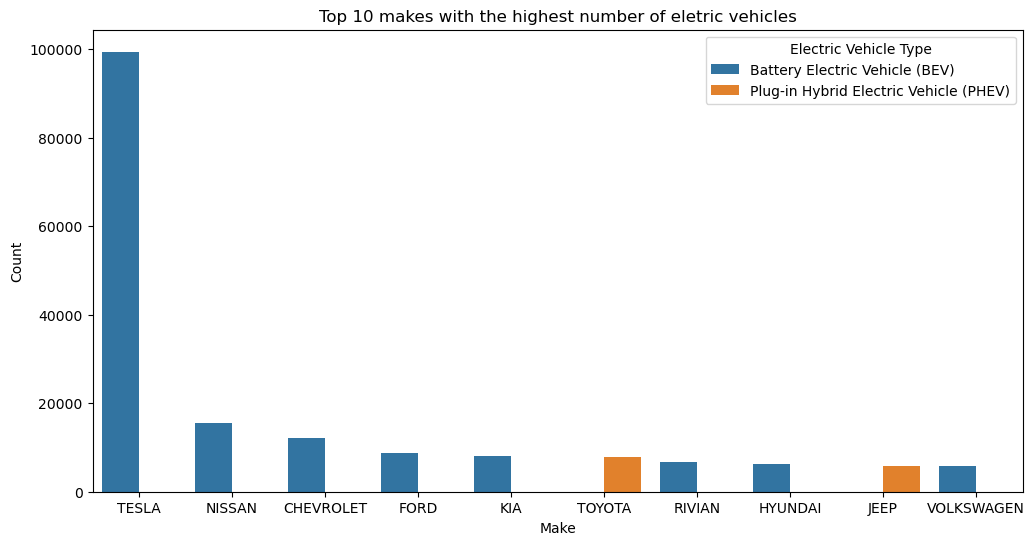

In [19]:
# Create a plot with the top 10 makes with the highest number of counts of vehicles to compare between them

top_10_make = make_df.head(10)
top_10_make = top_10_make.reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Make', y='Count', hue='Electric Vehicle Type', data=top_10_make)
plt.title('Top 10 makes with the highest number of eletric vehicles')
plt.xlabel('Make')
plt.ylabel('Count')
plt.show()

### Top 10 Makes with the Highest Number of Electric Vehicles

The plot above shows the top 10 vehicle manufacturers in terms of electric vehicle counts. A few key takeaways:

- **Tesla** dominates the dataset with a significantly higher number of electric vehicles than any other make. This is expected, as Tesla specializes exclusively in fully electric vehicles (BEVs).
- Most other manufacturers show a much smaller presence, and only a couple (like Toyota and Jeep) have notable counts of **Plug-in Hybrid Electric Vehicles (PHEVs)**.

Given Tesla’s overwhelming presence in the dataset, the next logical step is to explore the **specific Tesla models** that appear most frequently.

This might help identify:
- Which Tesla models are most popular.
- Whether a particular model is driving their market dominance.

Additionally, we’ll look into the **electric range** associated with each Tesla model to see if driving range plays a role in consumer choice.


In [20]:
#Just for Tesla cars we will count the number of cars by model and also display the eletric range

tesla_df = main_df[main_df['Make'] == 'TESLA']
tesla_df = tesla_df.groupby(['Model'])['Electric Range']
tesla_df = tesla_df.agg(['count', 'mean']).reset_index()
tesla_df.columns = ['Model', 'Count', 'Electric Range']
tesla_df = tesla_df.sort_values(by='Count', ascending=False)
tesla_df.head()

,Model,Count,Electric Range
4,MODEL Y,48390,14.168134
1,MODEL 3,35530,91.677512
2,MODEL S,7838,169.919750
3,MODEL X,6453,122.247637
0,CYBERTRUCK,1195,0.000000


### Tesla Models and Electric Range

We filtered the dataset to include only Tesla vehicles and grouped them by model, calculating both the number of vehicles and their average electric range.

Key observations:

- **Model Y** is the most common Tesla model in the dataset, followed by **Model 3**.
- Interestingly, the **electric range** doesn’t appear to be a major deciding factor in model popularity. For example, Model Y has the lowest average range among Tesla models but the highest count.
- This suggests that **price** or **affordability** may play a more important role in consumer decisions — lower-priced models tend to be more popular, while higher-end models like **Model S** and **Model X** have fewer entries.

To explore whether this pattern holds for other brands, we’ll now analyze vehicle models from **Nissan** and **Chevrolet**, and compare their electric range and popularity.



In [21]:
# Just for Nissan cars we will count the number of cars by model and also display the eletric range

nissan_df = main_df[main_df['Make'] == 'NISSAN']
nissan_df = nissan_df.groupby(['Model'])['Electric Range']
nissan_df = nissan_df.agg(['count', 'mean'])
nissan_df = nissan_df.reset_index()
nissan_df.columns = ['Model', 'Count', 'Electric Range']
nissan_df = nissan_df.sort_values(by='Count', ascending=False)
nissan_df.head()

,Model,Count,Electric Range
1,LEAF,13814,79.001593
0,ARIYA,1633,0.000000


In [22]:
# Just for Chevrolet cars we will count the number of cars by model and also display the eletric range

chevrolet_df = main_df[main_df['Make'] == 'CHEVROLET']
chevrolet_df = chevrolet_df.groupby(['Model'])['Electric Range']
chevrolet_df = chevrolet_df.agg(['count', 'mean']).reset_index()
chevrolet_df.columns = ['Model', 'Count', 'Electric Range']
chevrolet_df = chevrolet_df.sort_values(by='Count', ascending=False)
chevrolet_df.head()


,Model,Count,Electric Range
2,BOLT EV,7152,167.277685
7,VOLT,4756,45.406644
1,BOLT EUV,2853,0.000000
0,BLAZER EV,815,0.000000
4,EQUINOX EV,788,0.000000


### Nissan and Chevrolet: Model Counts and Electric Range

After analyzing Tesla, we extended our exploration to **Nissan** and **Chevrolet** to see if similar trends hold between model popularity and electric range.

#### Nissan
- The **Nissan LEAF** is by far the most popular model in the dataset, with a decent average electric range (~79 miles).
- The **Nissan ARIYA**, while likely newer or less adopted at the time of data collection, has a much lower count and shows an electric range of zero (possibly due to missing or unrecorded data).

#### Chevrolet
- The **Chevrolet Bolt EV** is the most common model, with a high average range (~167 miles).
- Other models like the **Volt** and **Bolt EUV** follow in popularity but show lower or missing electric range values.
- Less common models like **Blazer EV** and **Equinox EV** have very few entries and also lack range data.

#### Interpretation
Unlike Tesla, where range didn't appear to be a strong factor in model popularity, **Nissan and Chevrolet show a clearer correlation** between higher electric range and higher model adoption. This could indicate that:

- **Electric range is a more decisive factor** for consumers considering non-Tesla brands.
- Price still plays a role, but consumers may expect more range from electric models outside the premium Tesla brand.
- Some newer or less common models might not yet have reliable range data, which affects our ability to draw conclusions for them.

Next, we can explore geographic patterns or trends over time to further support or challenge these insights.


### Tesla Distribution by City

Since **Tesla** is the most common make in the dataset, it's valuable to examine how Tesla vehicles are distributed across different cities.

By doing this, we aim to:

- Understand which cities have the highest concentration of Tesla vehicles.
- Compare Tesla's presence to the overall distribution of electric vehicles in those same cities.
- Identify whether Tesla's dominance is consistent across regions or concentrated in specific urban centers.

This comparison will help us evaluate whether Tesla's popularity follows the same geographic trends as electric vehicles in general, or if it has unique patterns of adoption.


In [23]:
# Create a table with count of  tesla cars for each city

tesla_city_df = main_df[main_df['Make'] == 'TESLA']
tesla_city_df = tesla_city_df.groupby(['City'])['Make'].value_counts()
tesla_city_df = tesla_city_df.sort_values(ascending=False)
tesla_city_df = tesla_city_df.reset_index(name='Count')
tesla_city_df.columns = ['City', 'Make', 'Count']
tesla_city_df.head(10)


,City,Make,Count
0,Seattle,TESLA,13599
1,Bellevue,TESLA,6670
2,Redmond,TESLA,4687
3,Bothell,TESLA,4407
4,Sammamish,TESLA,4012
5,Kirkland,TESLA,3398
6,Vancouver,TESLA,3283
7,Renton,TESLA,3131
8,Kent,TESLA,2163
9,Lynnwood,TESLA,2117


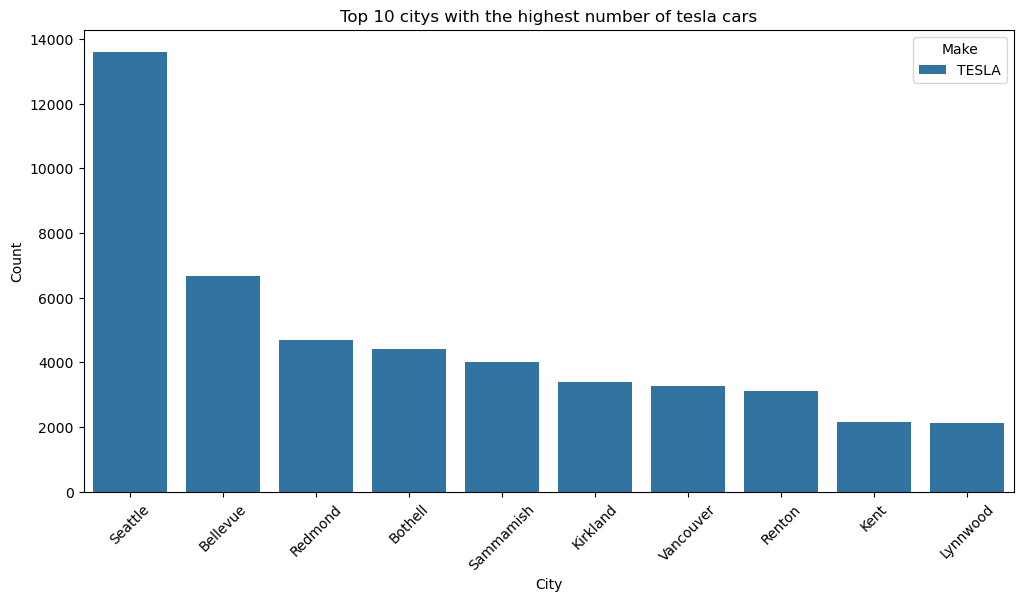

In [24]:
#Now create a plot with the top 10 citys with the highest number of counts of tesla cars to compare between them

top_10_tesla = tesla_city_df.head(10)
top_10_tesla = top_10_tesla.reset_index()
top_10_tesla = top_10_tesla[['City', 'Make', 'Count']]
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Count', hue='Make', data=top_10_tesla)
plt.title('Top 10 citys with the highest number of tesla cars')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Make')
plt.show()

## Tesla Vehicle Distribution by City

We filtered the dataset to show the top 10 cities with the highest number of Tesla vehicles. The chart highlights the geographic distribution of Tesla cars and provides an interesting comparison to the general electric vehicle distribution explored earlier.

#### Key Observations:
- **Seattle** remains the city with the highest number of Tesla vehicles, followed by **Bellevue**, **Redmond**, and others.
- However, **Vancouver**, which ranked higher in the overall electric vehicle distribution, falls behind when looking specifically at Tesla vehicles.

#### Insight:
This suggests a potential **market opportunity for Tesla** in cities like Vancouver:
- Vancouver clearly has a **strong demand for electric vehicles** in general.
- Yet, Tesla's presence in the city doesn't match that level of demand.
- Since Tesla leads in many other regions, it could **expand its market share** in Vancouver by increasing availability, marketing efforts, or infrastructure support.

This kind of geographic insight can be useful for strategic decisions in sales, marketing, or dealership expansion planning.


## Exploring Model Year Distribution

Next, we’ll analyze the **Model Year** column to see how electric vehicle adoption has evolved over time.

By grouping all vehicle makes by their model year, we aim to:

- Identify which **model years** have the highest number of electric vehicles.
- Understand whether **newer models** are becoming more prevalent, which could suggest growing adoption or production.
- Detect any shifts or trends that might be influenced by policy changes, technology improvements, or increased consumer demand.

This analysis will help us evaluate if **time** plays a role in electric vehicle growth and how that might vary across brands.


In [ ]:
#Checking the unique years in the dataset
main_df['model_year_extracted'] = main_df['Model Year'].dt.year
unique_model_years = main_df['model_year_extracted'].unique()
unique_model_years.sort()  # Optional: to see them in order
unique_model_years[:21]     # First 5 unique years


array([1999, 2000, 2002, 2003, 2008, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025],
      dtype=int32)

In [44]:
# Create a table to see the count of electric cars per 'Model Year'

model_year_df = main_df.groupby(['model_year_extracted']).size()
model_year_df = model_year_df.sort_values(ascending=False)
model_year_df = model_year_df.reset_index(name='Count')
model_year_df.columns = ['Model Year', 'Count']
model_year_df.head(20)

,Model Year,Count
0,2023,59682
1,2024,47876
2,2022,28836
3,2021,20505
4,2018,14261
5,2020,12218
6,2019,10942
7,2025,8885
8,2017,8526
9,2016,5362


Text(0, 0.5, 'Count')

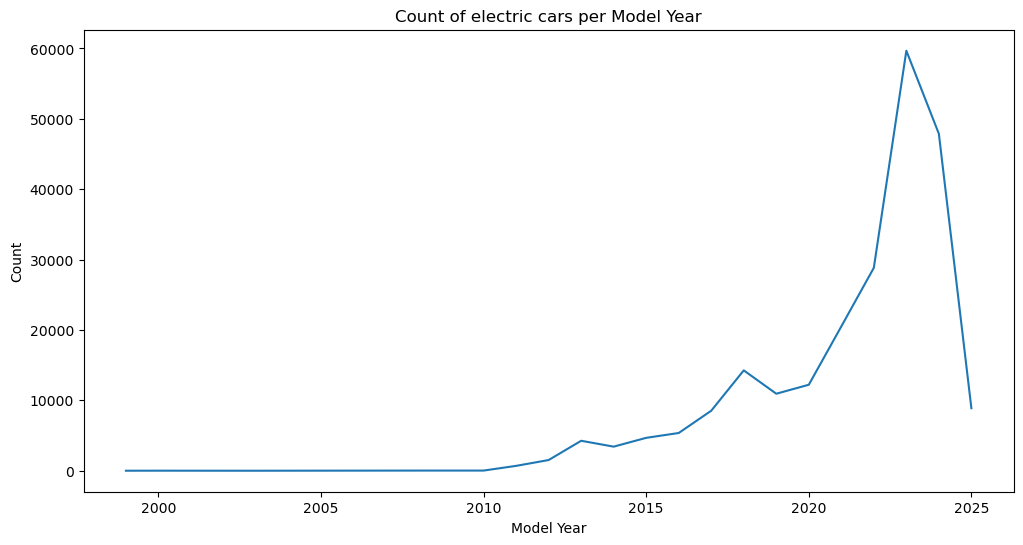

In [50]:
# Plot the count of electric cars per 'Model Year'


plt.figure(figsize=(12, 6))
sns.lineplot(x='Model Year', y='Count', data=model_year_df)
plt.title('Count of electric cars per Model Year')
plt.xlabel('Model Year')
plt.ylabel('Count')



### Electric Vehicle Trends by Model Year

The line plot above shows the number of electric vehicles in the dataset by model year. We can observe a clear upward trend over time.

#### Key Insights:
- There was **minimal adoption before 2010**, with a slow and steady increase through the early 2010s.
- A **sharp increase** in electric vehicle counts begins around **2018**, accelerating even more after **2020**.
- The **peak occurs around 2023**, indicating a surge in production and/or sales during that period.
- There is a **slight drop in 2025**, which is expected since the data may not be complete for the current year, and the industry may be stabilizing after the initial boom.

#### Interpretation:
This pattern strongly suggests that **demand and adoption of electric vehicles has rapidly grown** over the past few years, likely driven by:
- Technological advancements in battery range and performance.
- Improved public and private charging infrastructure.
- Increased environmental awareness and government incentives.

While the sharp growth has tapered slightly in 2025, this is likely part of a natural industry cycle following a large-scale transition to EVs.


## Advanced Exploratory Analysis

Now that we've completed a foundational exploration of the dataset, we’ll move into a more advanced stage of EDA.

This section will combine **time**, **location**, and **vehicle characteristics** to uncover deeper insights. Specifically, we’ll focus on:

1. **Geographic Visualization**: Use a map to display where electric vehicles are most concentrated, either by city or state.
2. **Yearly Trend by Vehicle Type**: Analyze how the distribution of BEVs and PHEVs has evolved over time.
3. **Top Brands Over Time**: Visualize which manufacturers were most dominant each year to better understand market shifts.

These steps will give us a clearer picture of how the electric vehicle market is growing, how it differs by region, and how different brands are competing over time.


In [51]:
main_df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,model_year_extracted
0,2T3YL4DV0E,King,Bellevue,WA,98005.0,2014-01-01,TOYOTA,RAV4,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,103.0,0.0,41.0,186450183,POINT (-122.1621 47.64441),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,2014
1,5YJ3E1EB6K,King,Bothell,WA,98011.0,2019-01-01,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,1.0,478093654,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,2019
2,5UX43EU02S,Thurston,Olympia,WA,98502.0,2025-01-01,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,40.0,0.0,35.0,274800718,POINT (-122.92333 47.03779),PUGET SOUND ENERGY INC,5.306701e+10,2025
3,JTMAB3FV5R,Thurston,Olympia,WA,98513.0,2024-01-01,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,2.0,260758165,POINT (-122.81754 46.98876),PUGET SOUND ENERGY INC,5.306701e+10,2024
4,5YJYGDEE8M,Yakima,Selah,WA,98942.0,2021-01-01,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,236581355,POINT (-120.53145 46.65405),PACIFICORP,5.307700e+10,2021


## Map: Electric Vehicle Distribution by City

To better understand the geographic spread of electric vehicles, we created an interactive map showing the number of EVs per city.

We grouped the dataset by city, counted the number of vehicles in each, and plotted the locations using `plotly.express.scatter_geo`.

This map helps visualize which urban areas have the highest concentration of EVs, and can reveal potential opportunities for manufacturers or infrastructure expansion.


In [57]:
# Limit to top 50 cities by vehicle count
top_cities = city_group.sort_values('Vehicle Count', ascending=False).head(50)

fig = px.scatter_geo(top_cities,
                     lat='Latitude',
                     lon='Longitude',
                     size='Vehicle Count',
                     hover_name='City',
                     title='Top 50 Cities by Electric Vehicle Count',
                     projection='natural earth',
                     size_max=30)

fig.update_traces(marker=dict(line=dict(width=0)), 
                  textposition='top center')

fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})
fig.show()


### 📍 Map: Electric Vehicle Concentration by City

We created an interactive geographic map to show the distribution of electric vehicles across the **top 50 cities** with the highest number of entries in the dataset.

To improve clarity, we:
- Limited the view to the top 50 cities based on EV count
- Removed city name labels to reduce visual clutter
- Used marker size to represent the number of vehicles in each city

#### Observations:
- **Coastal cities** appear to have a higher concentration of electric vehicles.
- This could reflect better infrastructure, higher environmental awareness, or local government incentives promoting EV adoption.

> Note: The dataset is likely focused on a specific region (such as Washington State), so while the map is regionally accurate, it doesn't reflect national trends.



## Electric Vehicle Type Trend Over the Years

To understand how electric vehicle types have evolved over time, we plotted the yearly distribution of **Battery Electric Vehicles (BEVs)** and **Plug-in Hybrid Electric Vehicles (PHEVs)**.

#### Observations:
- BEVs have seen a **significant increase** in recent years, especially after 2020.
- PHEVs appear relatively stable or slowly increasing, but **don't match the growth rate** of BEVs.
- This supports earlier insights that BEVs are becoming the **preferred option**, likely due to better range, infrastructure, and policy incentives.

The plot highlights a **clear shift toward full electrification**, with BEVs leading the market's growth.


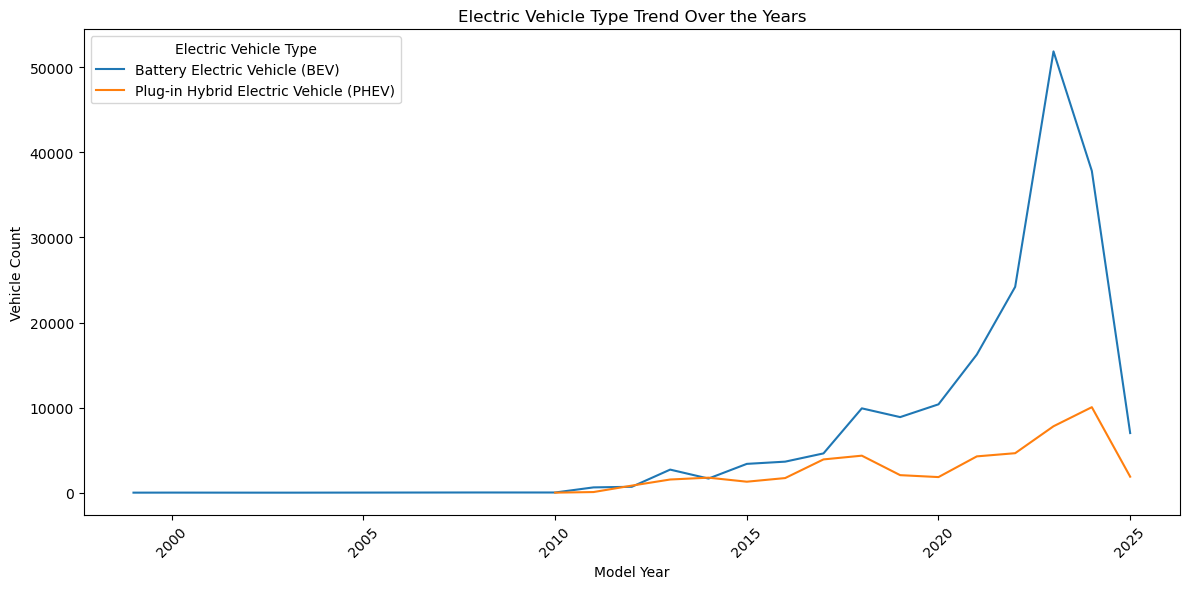

In [58]:
# Group by model year and electric vehicle type
ev_type_by_year = main_df.groupby(['model_year_extracted', 'Electric Vehicle Type']) \
                         .size().reset_index(name='Count')

# Plot the trend over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=ev_type_by_year,
             x='model_year_extracted',
             y='Count',
             hue='Electric Vehicle Type')

plt.title('Electric Vehicle Type Trend Over the Years')
plt.xlabel('Model Year')
plt.ylabel('Vehicle Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


###  Electric Vehicle Type Trend Over the Years

This line chart shows how electric vehicle types have evolved over time, comparing **Battery Electric Vehicles (BEVs)** and **Plug-in Hybrid Electric Vehicles (PHEVs)**.

#### Observations:
- Both types have seen growth, but **BEVs have surged significantly** in recent years.
- The growth accelerates especially after **2020**, likely driven by better charging infrastructure, increasing range, and stronger policy support.
- While PHEVs show some growth, it’s much more modest, and the gap between the two has widened over time.

This confirms a broader market shift toward **fully electric vehicles**, reflecting consumer preference for greener options as the technology matures.


## Top 10 Brands by Model Year (Heatmap)

This heatmap shows the distribution of electric vehicles by **Make** across different **model years**.

Each cell represents the number of vehicles from a specific brand in a given year. Darker shades indicate higher counts.

#### Observations:
- **Tesla** clearly leads across recent years, especially after 2018.
- Some brands like **Nissan** and **Chevrolet** have consistent presence but don't grow at the same pace.
- Other brands show more scattered appearances, likely reflecting a few popular models or experimental EV launches.

This visualization provides a quick snapshot of how brand dominance in the EV market has evolved over time.


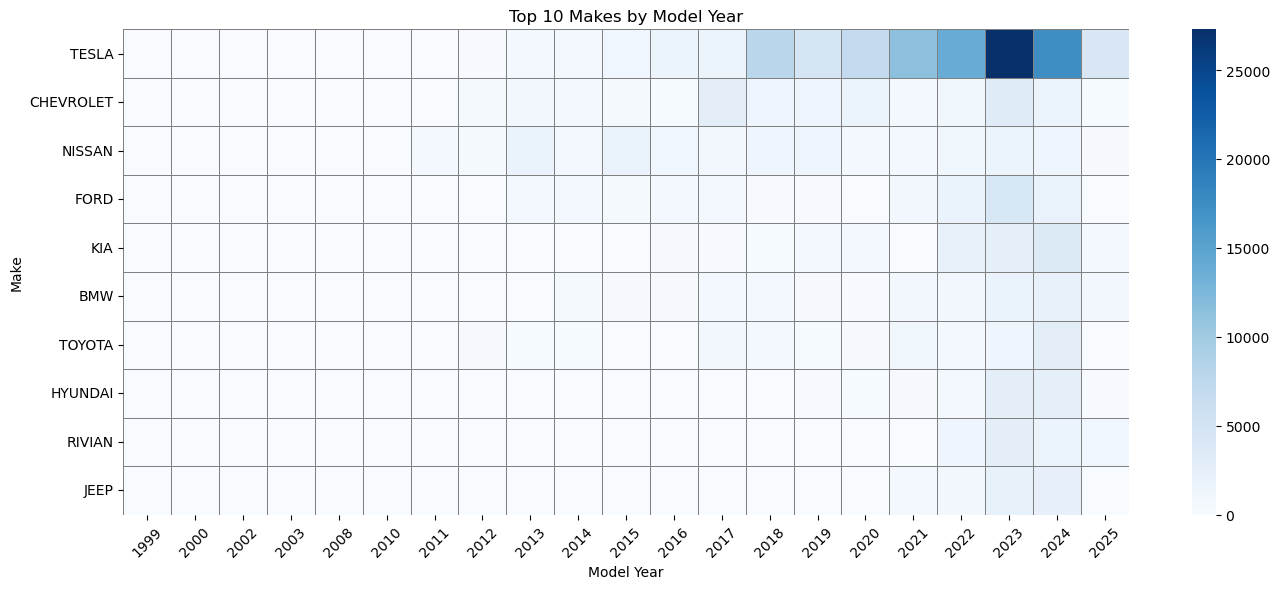

In [59]:
# Group by model year and make
brand_by_year = main_df.groupby(['model_year_extracted', 'Make']) \
                       .size().reset_index(name='Count')

# Pivot for heatmap
heatmap_data = brand_by_year.pivot(index='Make', columns='model_year_extracted', values='Count').fillna(0)

# Keep only top 10 most frequent brands overall
top_makes = heatmap_data.sum(axis=1).sort_values(ascending=False).head(10).index
heatmap_data = heatmap_data.loc[top_makes]

# Plot
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap='Blues', linewidths=0.5, linecolor='gray')
plt.title('Top 10 Makes by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Make')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


###  Top 10 Brands by Model Year

This heatmap shows how electric vehicle production has evolved across different brands over time.

Each cell represents the number of EVs from a given **Make** in a specific **Model Year**. Darker shades indicate a higher number of vehicles.

#### Observations:
- **Tesla** clearly dominates the electric vehicle space, especially from **2018 onward**, with a major spike around 2023.
- Other brands like **Chevrolet**, **Nissan**, and **Ford** have steady but lower contributions over the years.
- **Rivian**, **Jeep**, and **Hyundai** appear only in recent years, suggesting they're newer players in the EV space.
- Most brands saw increased activity post-2020, aligning with the general market expansion and consumer adoption of EVs.

This visualization helps highlight the **shift in industry leadership** and how quickly certain brands, especially Tesla, have taken over the EV market in recent years.


## ✅ Key Takeaways

After exploring the dataset from multiple perspectives — including vehicle types, cities, makes, and model years — here are the main insights:

- **Battery Electric Vehicles (BEVs)** significantly outnumber Plug-in Hybrids (PHEVs), and their growth has accelerated rapidly after 2020.
- **Tesla** is by far the most dominant brand in the dataset, particularly in recent years, and leads in nearly every major city included.
- Cities like **Seattle** and **Bellevue** have the highest EV adoption, while places like **Vancouver**, despite high EV numbers, show lower Tesla adoption — potentially revealing untapped market opportunities.
- The **most common Tesla models** are not necessarily the ones with the longest range, suggesting that **price and accessibility** may influence consumer decisions more than range.
- **Coastal cities** appear to have a higher concentration of electric vehicles, which could reflect stronger infrastructure and local incentives.
- Over time, the **brand landscape has become more competitive**, with more automakers entering the market in the early 2020s.

---

## 🔍 Further Analysis (If More Data Were Available)

If additional data were available, we could take the analysis even further:

- **Pricing Data**: Analyze how electric vehicle cost correlates with adoption, model popularity, and electric range.
- **Demographic or Income Data by City**: Investigate how socioeconomic factors affect EV adoption.
- **Charging Infrastructure**: Study the relationship between the number of public charging stations and EV growth.
- **Time Series Sales Data**: Perform forecasting or seasonal trend analysis to better understand market dynamics.
- **CO₂ Emissions Saved or Efficiency Ratings**: Quantify the environmental impact and efficiency advantages of different EV models.

---

This notebook serves as a strong foundation for exploratory data analysis and sets the stage for more complex modeling or business insights if richer datasets become available.
